In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/Forestcasting_1.xlsx'
excel_data = pd.ExcelFile(file_path)

In [ ]:
sheet_names = excel_data.sheet_names
sheet_names

['Balance_Sheet', 'Income_satatemen', 'Cash_Flow']

In [ ]:
# Leer el archivo Excel
excel_data = pd.ExcelFile(file_path)

# Mostrar nombres de las hojas
sheet_names = excel_data.sheet_names
print(sheet_names)

# Leer cada hoja en un dataframe
balance_sheet_df = pd.read_excel(file_path, sheet_name='Balance_Sheet')
income_statement_df = pd.read_excel(file_path, sheet_name='Income_satatemen')
cash_flow_df = pd.read_excel(file_path, sheet_name='Cash_Flow')

# Mostrar las primeras filas de cada dataframe
print("Balance Sheet DataFrame:")
print(balance_sheet_df.head())

print("\nIncome Statement DataFrame:")
print(income_statement_df.head())

print("\nCash Flow DataFrame:")
print(cash_flow_df.head())

['Balance_Sheet', 'Income_satatemen', 'Cash_Flow']
Balance Sheet DataFrame:
                               Field Name  27-01-2024  28-10-2023  29-07-2023  \
0                 Cash & Cash Equivalents        7280        5519        5783   
1  Loans & Receivables - Net - Short-Term        9999        8309        7066   
2                     Inventories - Total        5282        4779        4319   
3           Prepaid Expenses - Short-Term        3080        1289        1389   
4                    Total Current Assets       44345       32658       28797   

   29-04-2023  28-01-2023  29-10-2022  30-07-2022  30-04-2022  29-01-2022  \
0        5079        3389        2800        3013        3887        1990   
1        4080        3827        4908        5317        5438        4650   
2        4611        5159        4454        3889        3163        2605   
3         872         791         718        1175         636         366   
4       24883       23073       23223       27418   

In [ ]:
# Reformatear los dataframes
def reshape_dataframe(df):
    df_melted = pd.melt(df, id_vars=['Field Name'], var_name='date', value_name='value')
    return df_melted

balance_sheet_df_reshaped = reshape_dataframe(balance_sheet_df)
income_statement_df_reshaped = reshape_dataframe(income_statement_df)
cash_flow_df_reshaped = reshape_dataframe(cash_flow_df)


In [ ]:
balance_sheet_df_reshaped

,Field Name,date,value
0,Cash & Cash Equivalents,27-01-2024,7280.00
1,Loans & Receivables - Net - Short-Term,27-01-2024,9999.00
2,Inventories - Total,27-01-2024,5282.00
3,Prepaid Expenses - Short-Term,27-01-2024,3080.00
4,Total Current Assets,27-01-2024,44345.00
...,...,...,...
907,Total Current Liabilities,30-01-2010,784.38
908,Total Non-Current Liabilities,30-01-2010,136.40
909,Total Liabilities,30-01-2010,920.78
910,Shareholders' Equity - Attributable to Parent ...,30-01-2010,2665.14


In [ ]:
def pivot_dataframe(df):
    df_pivoted = df.pivot(index='date', columns='Field Name', values='value').reset_index()
    return df_pivoted

balance_sheet_df_pivoted = pivot_dataframe(balance_sheet_df_reshaped)
income_statement_df_pivoted = pivot_dataframe(income_statement_df_reshaped)
cash_flow_df_pivoted = pivot_dataframe(cash_flow_df_reshaped)

In [ ]:
# Reformatear los dataframes
def reshape_dataframe(df):
    df_melted = pd.melt(df, id_vars=['Field Name'], var_name='date', value_name='value')
    return df_melted

balance_sheet_df_reshaped = reshape_dataframe(balance_sheet_df)
income_statement_df_reshaped = reshape_dataframe(income_statement_df)
cash_flow_df_reshaped = reshape_dataframe(cash_flow_df)

# Pivotear los dataframes reformateados y eliminar los apóstrofes en los nombres de columnas
def pivot_and_clean_dataframe(df):
    df_pivoted = df.pivot(index='date', columns='Field Name', values='value').reset_index()
    df_pivoted.columns = df_pivoted.columns.str.replace("'", "")  # Eliminar apóstrofes
    return df_pivoted

balance_sheet_df_pivoted = pivot_and_clean_dataframe(balance_sheet_df_reshaped)
income_statement_df_pivoted = pivot_and_clean_dataframe(income_statement_df_reshaped)
cash_flow_df_pivoted = pivot_and_clean_dataframe(cash_flow_df_reshaped)


In [ ]:
balance_sheet_df_pivoted

Field Name,date,Cash & Cash Equivalents,Intangible Assets - Total - Net,Inventories - Total,"Investments in Associates, Joint Ventures and Unconsolidated Subsidiaries",Loans & Receivables - Net - Short-Term,Other Non-Current Assets - Total,Prepaid Expenses - Short-Term,"Property, Plant & Equipment - Net - Total",Shareholders Equity - Attributable to Parent Shareholders - Total,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Non-Current Assets,Total Non-Current Liabilities
0,01-05-2010,447.26,485.27,388.14,0.0,529.66,41.87,26.27,548.92,2860.65,3803.03,2726.98,765.29,942.39,3803.03,1076.05,177.09
1,01-05-2021,978.00,6806.00,1992.00,0.0,3024.00,2868.00,179.00,2995.00,18774.00,30796.00,18127.00,4004.00,12022.00,30796.00,12669.00,8018.00
2,24-01-2015,497.00,840.00,483.00,0.0,474.00,91.00,70.00,557.00,4418.00,7201.00,5713.00,896.00,2783.00,7201.00,1488.00,1887.00
3,24-10-2015,471.00,790.00,425.00,0.0,536.00,73.00,93.00,477.00,4465.00,7174.00,5834.00,855.00,2709.00,7174.00,1340.00,1854.00
4,24-10-2020,2251.00,7054.00,1495.00,0.0,2546.00,2694.00,213.00,2740.00,15334.00,26881.00,14393.00,3669.00,11547.00,26881.00,12488.00,7878.00
5,25-01-2014,1151.59,939.19,387.77,0.0,426.36,104.25,70.29,582.74,4456.40,7250.89,5624.71,945.50,2794.50,7250.89,1626.18,1849.00
6,25-01-2020,10896.00,667.00,979.00,0.0,1657.00,666.00,157.00,2292.00,12204.00,17315.00,13690.00,1784.00,5111.00,17315.00,3625.00,3327.00
7,25-04-2015,464.00,823.00,438.00,0.0,455.00,89.00,89.00,547.00,4556.00,7291.00,5832.00,883.00,2735.00,7291.00,1459.00,1852.00
8,25-04-2020,15494.00,708.00,1128.00,0.0,1907.00,652.00,195.00,2310.00,13099.00,23254.00,19584.00,1903.00,10155.00,23254.00,3670.00,8252.00
9,25-07-2015,435.00,808.00,441.00,0.0,514.00,66.00,89.00,497.00,4185.00,6979.00,5608.00,936.00,2794.00,6979.00,1371.00,1858.00


In [ ]:
#balance_sheet_df_pivoted.columns
#income_statement_df_pivoted.columns
cash_flow_df_pivoted.columns

Index(['date', 'FCN Ok', 'Net Cash - Beginning Balance',
       'Net Cash - Ending Balance', 'Net Cash Flow from Financing Activities',
       'Net Cash Flow from Investing Activities',
       'Net Cash Flow from Operating Activities', 'Net Change in Cash - Total',
       'Other Non-Cash Items & Reconciliation Adjustments - Cash Flow - to Reconcile'],
      dtype='object', name='Field Name')

In [ ]:
balance_df = balance_sheet_df_pivoted[['date','Total Liabilities & Equity',
                                       'Shareholders Equity - Attributable to Parent Shareholders - Total',
                                       'Total Liabilities', 'Total Non-Current Liabilities',
                                       'Total Current Liabilities','Total Assets',
                                       'Total Non-Current Assets', 'Total Current Assets']]

inStatement_df = income_statement_df_pivoted[['date','Revenue from Business Activities - Total_1',
                                       'Gross Profit - Industrials/Property - Total_1',
                                       'Operating Profit before Non-Recurring Income/Expense',
                                       'Net Income after Tax']]

cashflow_df = cash_flow_df_pivoted[['date','Net Cash Flow from Operating Activities' ,'Net Cash Flow from Investing Activities'
                                     ,
                                    'Net Cash Flow from Financing Activities',
                                    'Net Change in Cash - Total', 'Net Cash - Beginning Balance',
                                    'Net Cash - Ending Balance',
                                       'FCN Ok'
                                       ]]



In [ ]:
# Convertir 'date' en una serie de tiempo
balance_df['date'] = pd.to_datetime(balance_df['date'], dayfirst=True)
inStatement_df['date'] = pd.to_datetime(inStatement_df['date'], dayfirst=True)
cashflow_df['date'] = pd.to_datetime(cashflow_df['date'], dayfirst=True)

<ipython-input-14-9f3b461c07df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balance_df['date'] = pd.to_datetime(balance_df['date'], dayfirst=True)
<ipython-input-14-9f3b461c07df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inStatement_df['date'] = pd.to_datetime(inStatement_df['date'], dayfirst=True)
<ipython-input-14-9f3b461c07df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
print(balance_df.columns)
print(balance_df.head())

Index(['date', 'Total Liabilities & Equity',
       'Shareholders Equity - Attributable to Parent Shareholders - Total',
       'Total Liabilities', 'Total Non-Current Liabilities',
       'Total Current Liabilities', 'Total Assets', 'Total Non-Current Assets',
       'Total Current Assets'],
      dtype='object', name='Field Name')
Field Name       date  Total Liabilities & Equity  \
0          2010-05-01                     3803.03   
1          2021-05-01                    30796.00   
2          2015-01-24                     7201.00   
3          2015-10-24                     7174.00   
4          2020-10-24                    26881.00   

Field Name  Shareholders Equity - Attributable to Parent Shareholders - Total  \
0                                                     2860.65                   
1                                                    18774.00                   
2                                                     4418.00                   
3                     

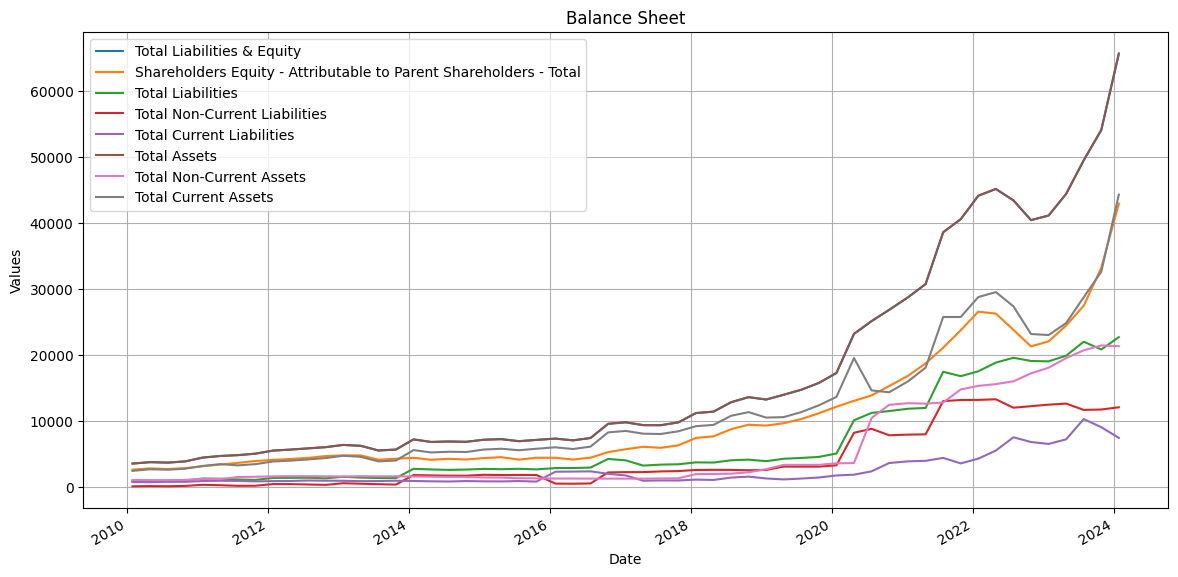

In [ ]:
balance_df = balance_df.groupby('date').mean().reset_index()

# Convertir 'date' en el índice del dataframe nuevamente
balance_df.set_index('date', inplace=True)

# Graficar todas las columnas de balance_df
balance_df.plot(figsize=(14, 7))
plt.title('Balance Sheet')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

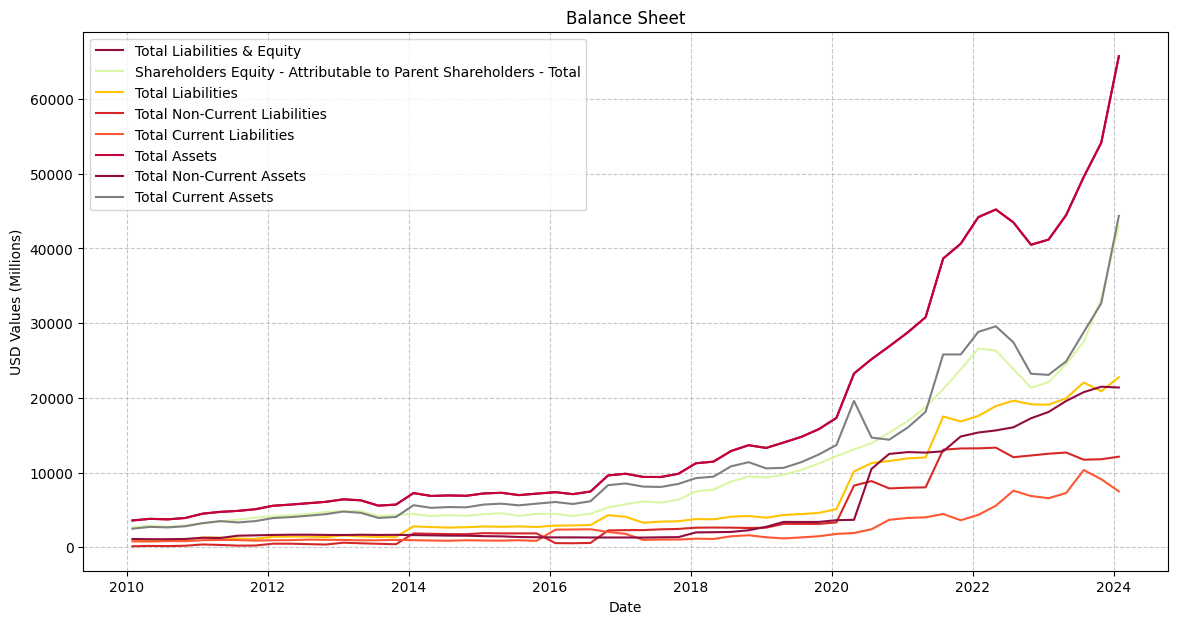

In [ ]:
colors = ['#900C3F', '#DAF7A6', '#FFC300', '#d62728', '#FF5733', '#C70039', '#900C3F', '#7f7f7f', '#bcbd22']

# Eliminar duplicados y asegurarse de que cada fecha tenga un solo valor por columna
balance_df = balance_df.groupby('date').mean().reset_index()

# Convertir 'date' en el índice del dataframe nuevamente
balance_df.set_index('date', inplace=True)

# Crear figura
plt.figure(figsize=(14, 7))

# Graficar cada columna con un color diferente
for i, column in enumerate(balance_df.columns):
    plt.plot(balance_df.index, balance_df[column], label=column, color=colors[i % len(colors)])

# Agregar título y etiquetas
plt.title('Balance Sheet')
plt.xlabel('Date')
plt.ylabel('USD Values (Millions)')

# Personalizar la leyenda
plt.legend(loc='best')

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

In [ ]:
#!apt-get install imagemagick

In [ ]:
import matplotlib.animation as animation

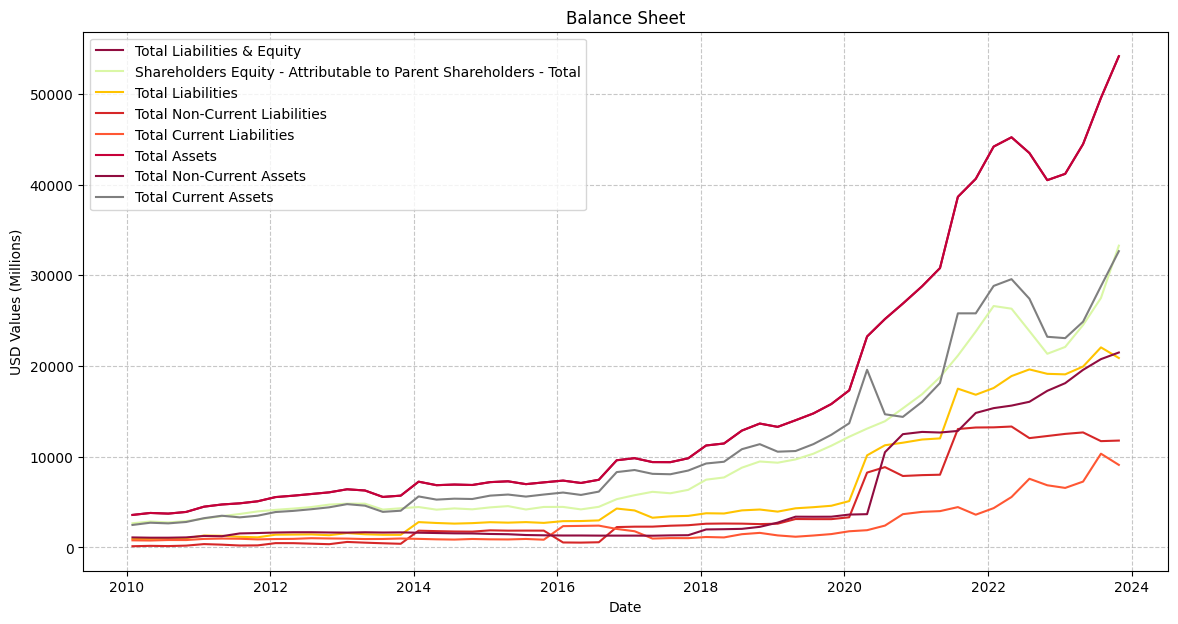

In [ ]:
colors = ['#900C3F', '#DAF7A6', '#FFC300', '#d62728', '#FF5733', '#C70039', '#900C3F', '#7f7f7f', '#bcbd22']

# Eliminar duplicados y asegurarse de que cada fecha tenga un solo valor por columna
balance_df = balance_df.groupby('date').mean().reset_index()

# Convertir 'date' en el índice del dataframe nuevamente
balance_df.set_index('date', inplace=True)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 7))

def animate(i):
    ax.clear()
    for j, column in enumerate(balance_df.columns):
        ax.plot(balance_df.index[:i], balance_df[column][:i], label=column, color=colors[j % len(colors)])
    ax.set_title('Balance Sheet')
    ax.set_xlabel('Date')
    ax.set_ylabel('USD Values (Millions)')
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.7)

ani = animation.FuncAnimation(fig, animate, frames=len(balance_df), interval=700)

# Guardar la animación como GIF
ani.save('balance_sheet_animation.gif', writer='imagemagick')

plt.show()

In [ ]:
#inStatement_df

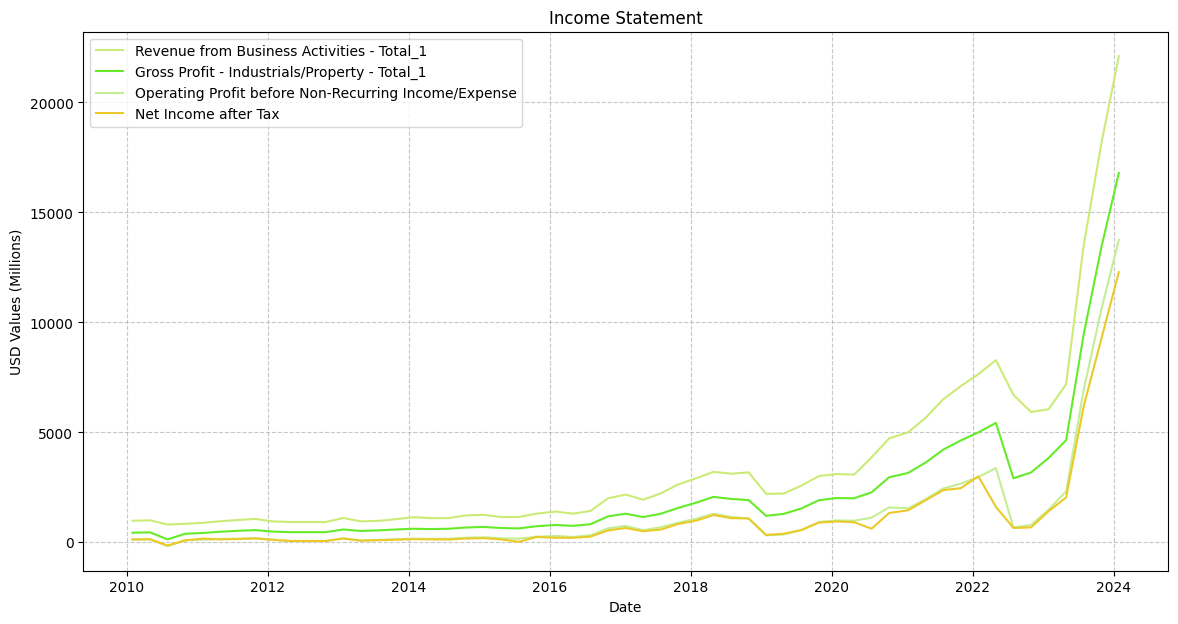

In [ ]:
colors = ['#CCEB76', '#65EB28', '#C4EE95', '#EBCA28']

# Eliminar duplicados y asegurarse de que cada fecha tenga un solo valor por columna
inStatement_df = inStatement_df.groupby('date').mean().reset_index()

# Convertir 'date' en el índice del dataframe nuevamente
inStatement_df.set_index('date', inplace=True)

# Crear figura
plt.figure(figsize=(14, 7))

# Graficar cada columna con un color diferente
for i, column in enumerate(inStatement_df.columns):
    plt.plot(inStatement_df.index, inStatement_df[column], label=column, color=colors[i % len(colors)])

# Agregar título y etiquetas
plt.title('Income Statement')
plt.xlabel('Date')
plt.ylabel('USD Values (Millions)')

# Personalizar la leyenda
plt.legend(loc='best')

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

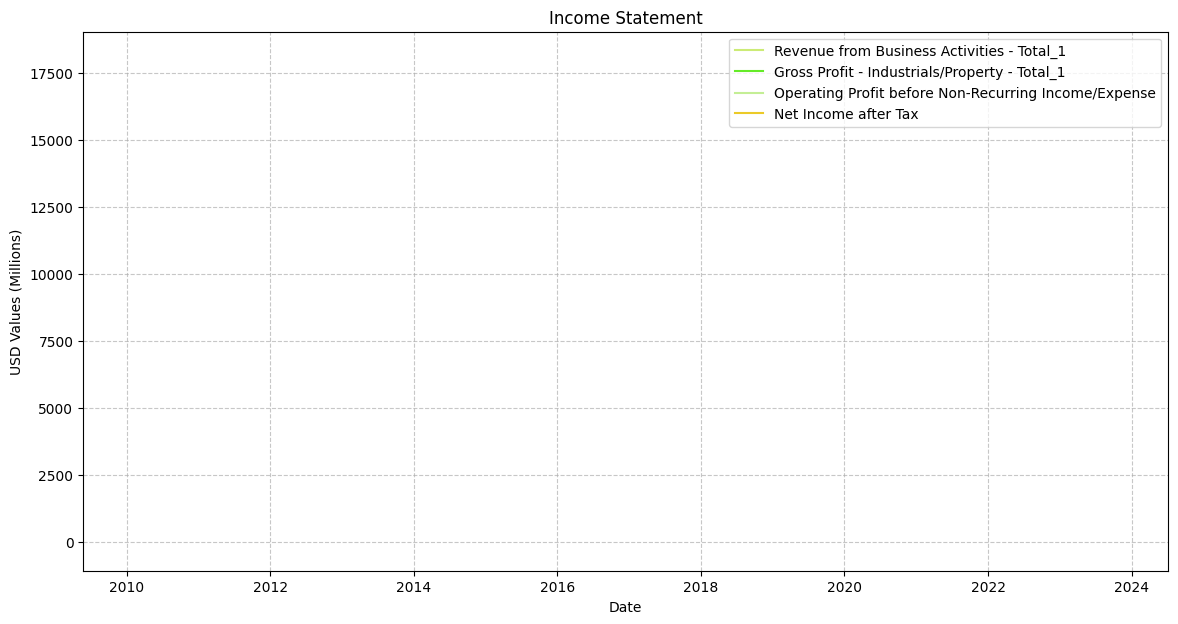

In [ ]:
colors = ['#CCEB76', '#65EB28', '#C4EE95', '#EBCA28']
# Eliminar duplicados y asegurarse de que cada fecha tenga un solo valor por columna
inStatement_df = inStatement_df.groupby('date').mean().reset_index()

# Convertir 'date' en el índice del dataframe nuevamente
inStatement_df.set_index('date', inplace=True)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 7))

def animate(i):
    ax.clear()
    for j, column in enumerate(inStatement_df.columns):
        ax.plot(inStatement_df.index[:i], inStatement_df[column][:i], label=column, color=colors[j % len(colors)])
    ax.set_title('Income Statement')
    ax.set_xlabel('Date')
    ax.set_ylabel('USD Values (Millions)')
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.7)

ani = animation.FuncAnimation(fig, animate, frames=len(inStatement_df), interval=700)

# Guardar la animación como GIF
ani.save('Income Statement_animation.gif', writer='imagemagick')

In [ ]:
#cashflow_df

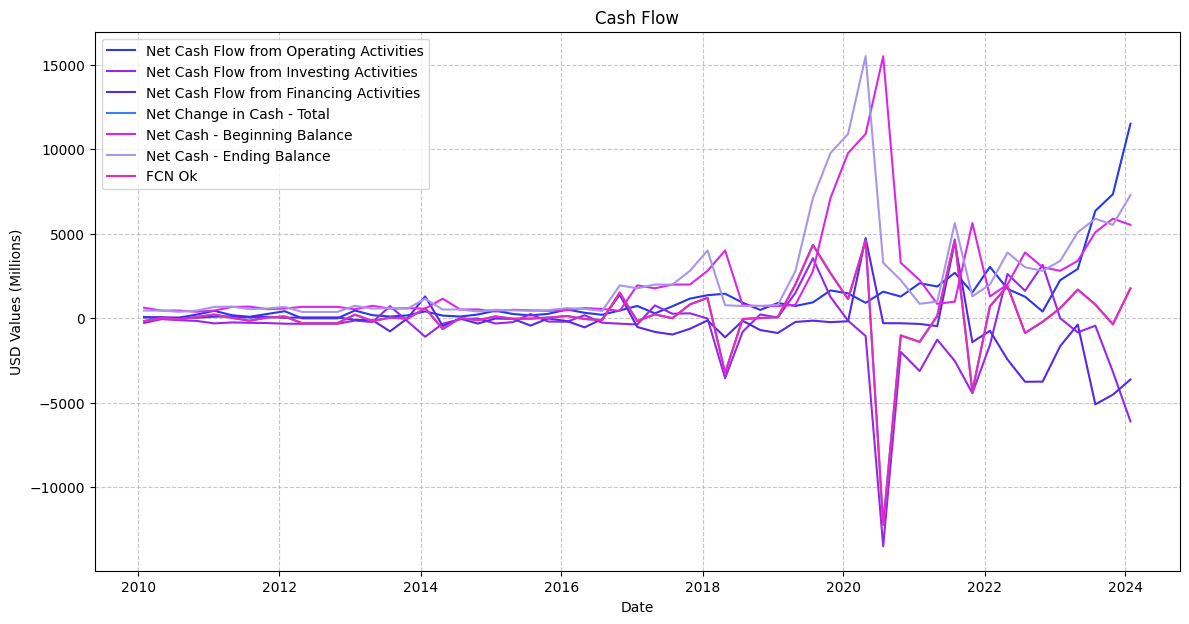

In [ ]:
colors = ['#2838EB', '#9628EB', '#5728EB', '#3A81EB', '#D628EB', '#AA95ED', '#EB28BD' ]

# Eliminar duplicados y asegurarse de que cada fecha tenga un solo valor por columna
cashflow_df = cashflow_df.groupby('date').mean().reset_index()

# Convertir 'date' en el índice del dataframe nuevamente
cashflow_df.set_index('date', inplace=True)

# Crear figura
plt.figure(figsize=(14, 7))

# Graficar cada columna con un color diferente
for i, column in enumerate(cashflow_df.columns):
    plt.plot(cashflow_df.index, cashflow_df[column], label=column, color=colors[i % len(colors)])

# Agregar título y etiquetas
plt.title('Cash Flow')
plt.xlabel('Date')
plt.ylabel('USD Values (Millions)')

# Personalizar la leyenda
plt.legend(loc='best')

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

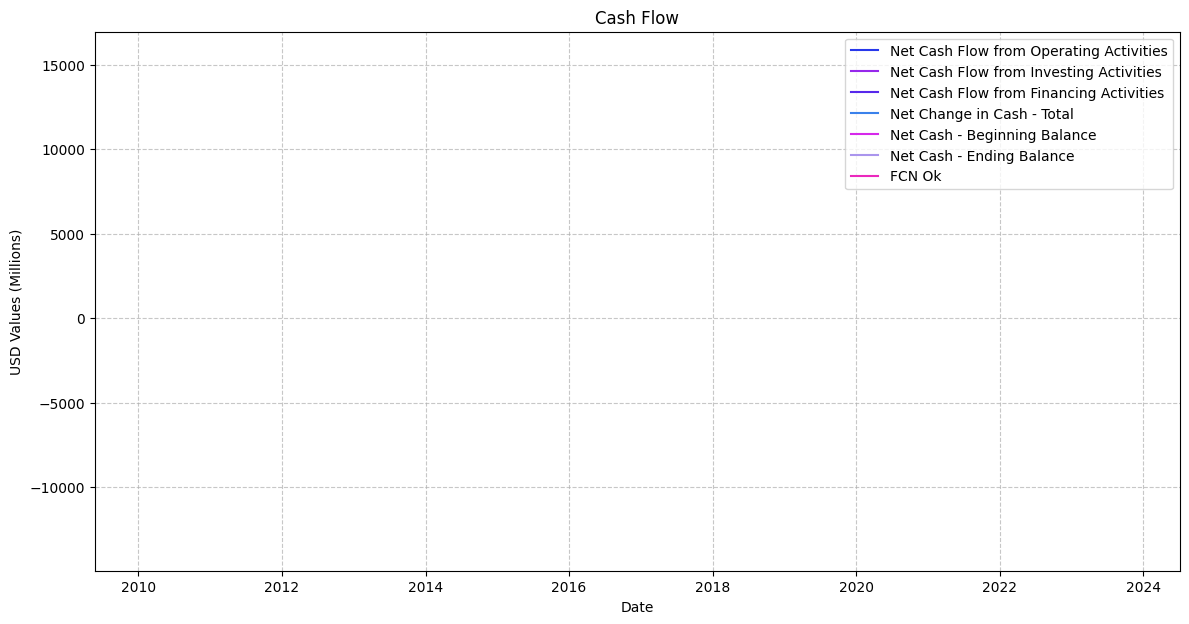

In [ ]:
colors = ['#2838EB', '#9628EB', '#5728EB', '#3A81EB', '#D628EB', '#AA95ED', '#EB28BD' ]
# Eliminar duplicados y asegurarse de que cada fecha tenga un solo valor por columna
cashflow_df = cashflow_df.groupby('date').mean().reset_index()

# Convertir 'date' en el índice del dataframe nuevamente
cashflow_df.set_index('date', inplace=True)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 7))

def animate(i):
    ax.clear()
    for j, column in enumerate(cashflow_df.columns):
        ax.plot(cashflow_df.index[:i], cashflow_df[column][:i], label=column, color=colors[j % len(colors)])
    ax.set_title('Cash Flow')
    ax.set_xlabel('Date')
    ax.set_ylabel('USD Values (Millions)')
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.7)

ani = animation.FuncAnimation(fig, animate, frames=len(cashflow_df), interval=700)
ani.save('Cash_flow_animation.gif', writer='imagemagick')

In [ ]:
balance_df.reset_index(inplace=True)
balance_df['date'] = pd.to_datetime(balance_df['date'])
balance_df.set_index('date', inplace=True)

# Dividir los datos en entrenamiento y prueba (últimos 6 trimestres para prueba)
train = balance_df.iloc[:-6]
test = balance_df.iloc[-6:]

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Función para entrenar SARIMA y predecir
def sarima_forecast(train, test, order, seasonal_order):
    model = sm.tsa.SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=len(test))
    return forecast, model_fit

# Parámetros del modelo SARIMA
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)  # Trimestral

# Resultados
results = {}
for column in train.columns:
    forecast, model_fit = sarima_forecast(train[column], test[column], order, seasonal_order)
    rmse = np.sqrt(mean_squared_error(test[column], forecast))
    results[column] = {
        'forecast': forecast,
        'rmse': rmse,
        'model_fit': model_fit
    }

# Mostrar RMSE de cada variable
for column, result in results.items():
    print(f'{column} - RMSE: {result["rmse"]}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

Total Liabilities & Equity - RMSE: 5458.67022902468
Shareholders Equity - Attributable to Parent Shareholders - Total - RMSE: 8707.847274450254
Total Liabilities - RMSE: 2085.7253886030567
Total Non-Current Liabilities - RMSE: 918.0372341985524
Total Current Liabilities - RMSE: 3098.5990646844334
Total Assets - RMSE: 5458.67022902468
Total Non-Current Assets - RMSE: 1515.5220172790846
Total Current Assets - RMSE: 5691.799070363318


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
results

{'Total Liabilities & Equity': {'forecast': 51    45347.886672
  52    47200.993220
  53    49269.440844
  54    52094.714181
  55    53994.058616
  56    56276.484838
  Name: predicted_mean, dtype: float64,
  'rmse': 5458.67022902468,
  'model_fit': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7d29b9701210>},
 'Shareholders Equity - Attributable to Parent Shareholders - Total': {'forecast': 51    21898.555141
  52    20440.333102
  53    20515.063948
  54    21895.209762
  55    23650.453048
  56    25314.594624
  Name: predicted_mean, dtype: float64,
  'rmse': 8707.847274450254,
  'model_fit': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7d29b9702a70>},
 'Total Liabilities': {'forecast': 51    19983.675977
  52    20587.999410
  53    21957.930994
  54    23933.821347
  55    24201.594313
  56    24870.880864
  Name: predicted_mean, dtype: float64,
  'rmse': 2085.7253886030567,
  'model_fit': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrappe

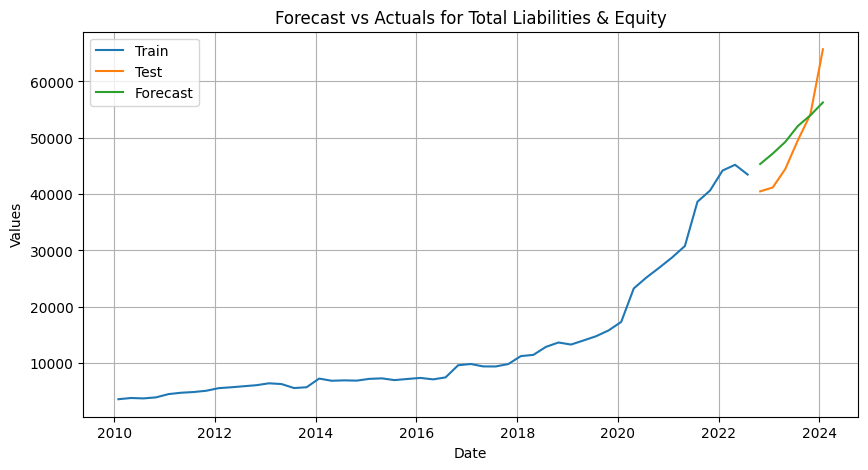

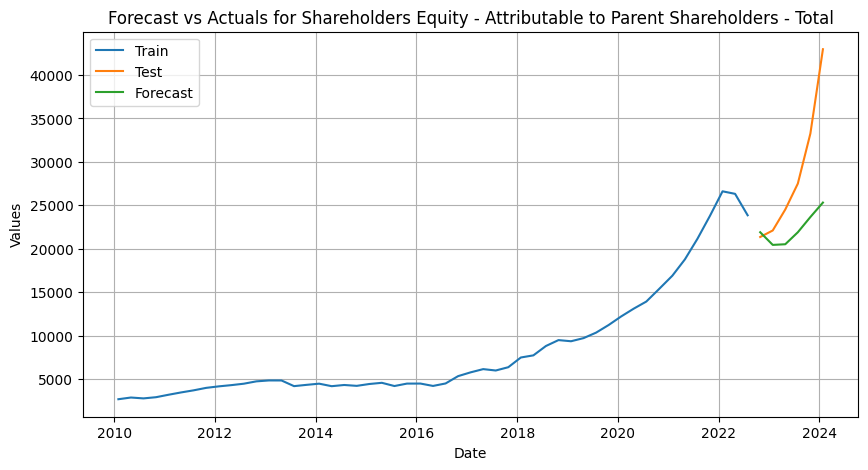

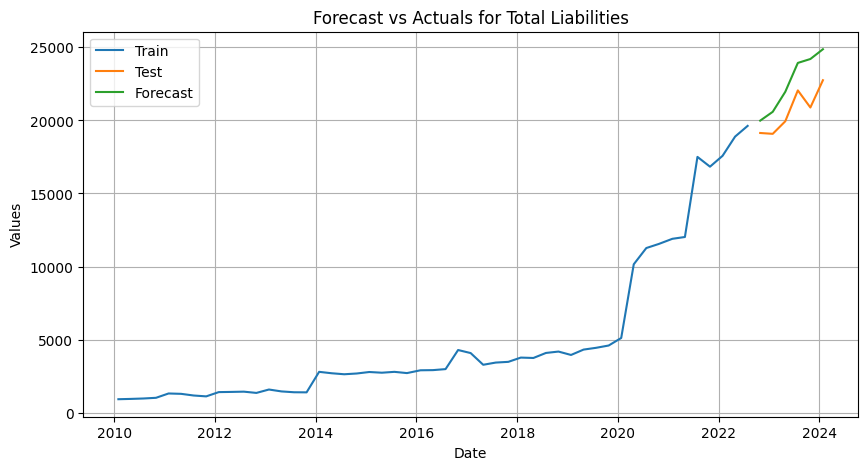

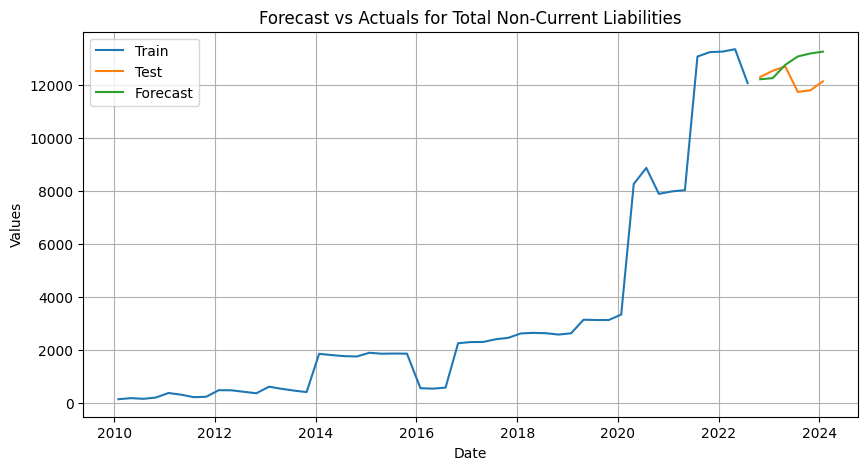

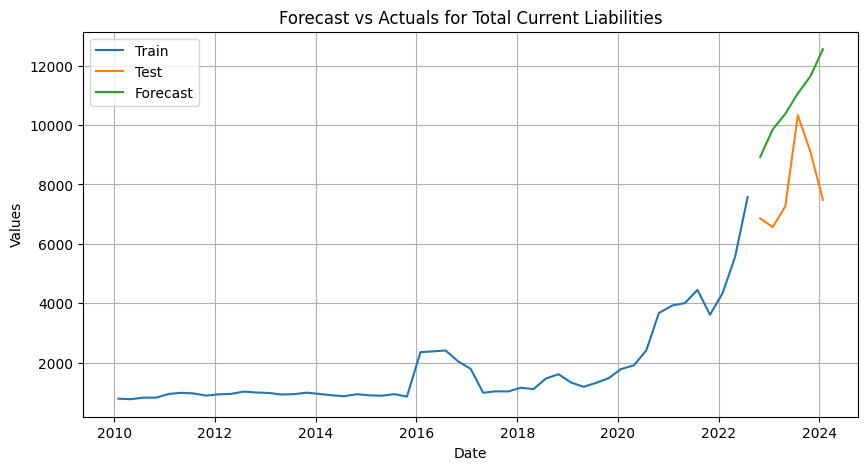

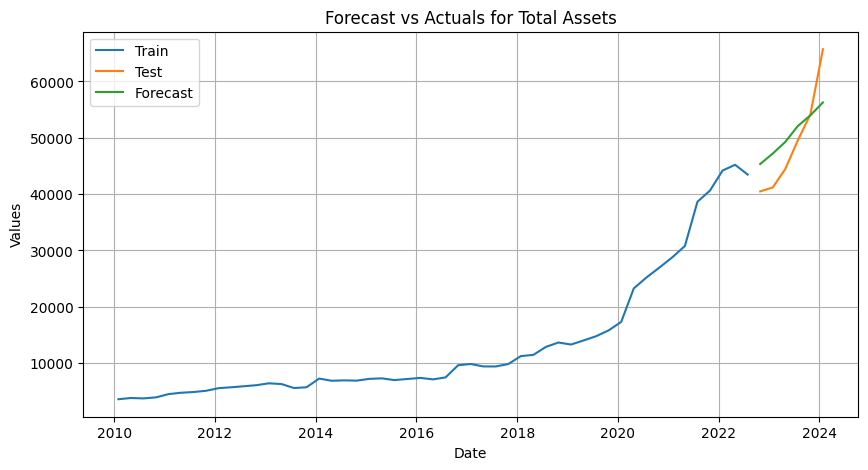

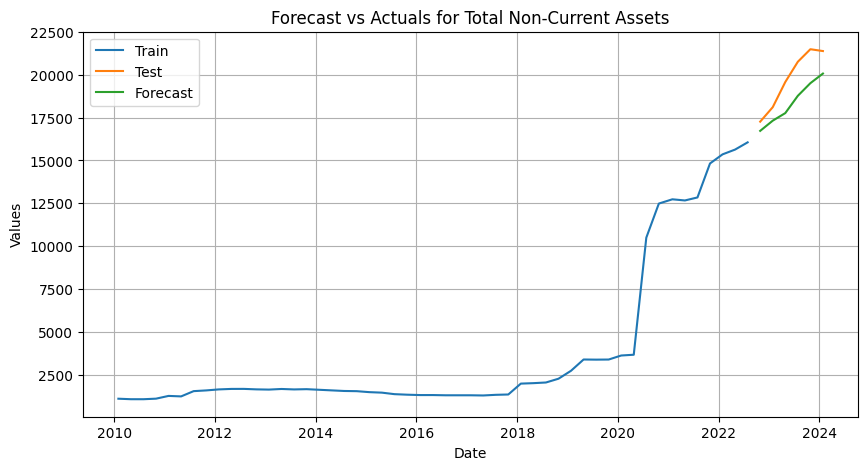

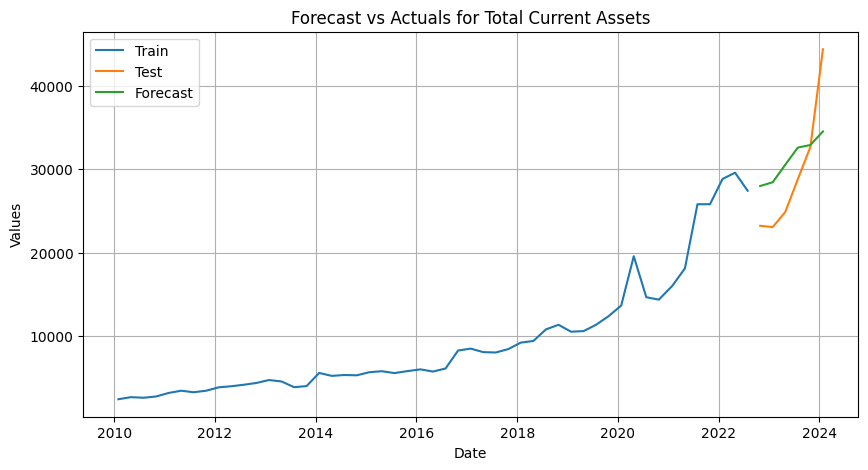

In [ ]:
# Graficar resultados
for column, result in results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(train[column], label='Train')
    plt.plot(test[column], label='Test')
    plt.plot(test.index, result['forecast'], label='Forecast')
    plt.title(f'Forecast vs Actuals for {column}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

Total Liabilities & Equity - RMSE: 5458.67022902468
Shareholders Equity - Attributable to Parent Shareholders - Total - RMSE: 8707.847274450254
Total Liabilities - RMSE: 2085.7253886030567
Total Non-Current Liabilities - RMSE: 918.0372341985524
Total Current Liabilities - RMSE: 3098.5990646844334
Total Assets - RMSE: 5458.67022902468
Total Non-Current Assets - RMSE: 1515.5220172790846
Total Current Assets - RMSE: 5691.799070363318


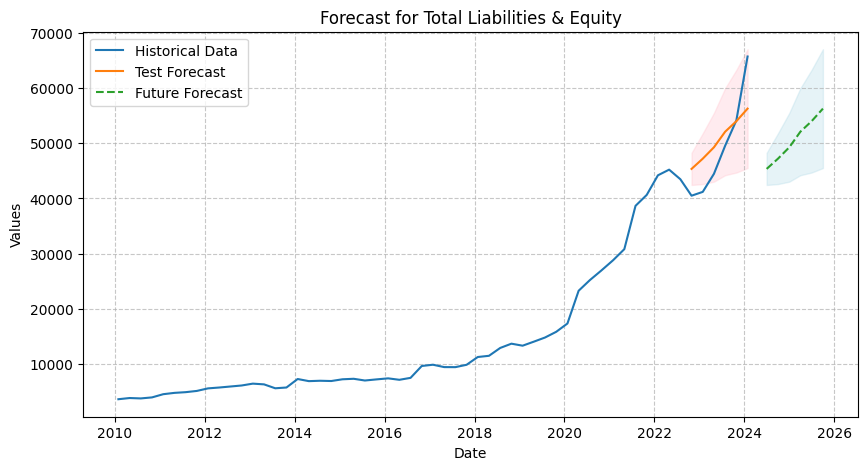

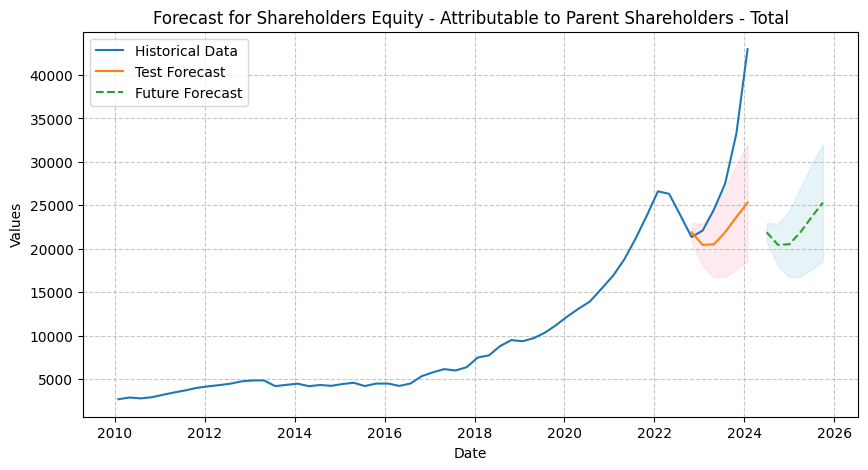

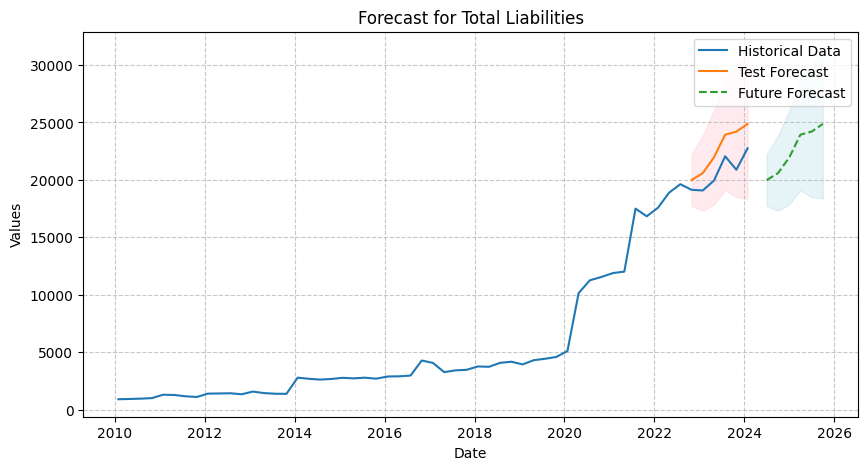

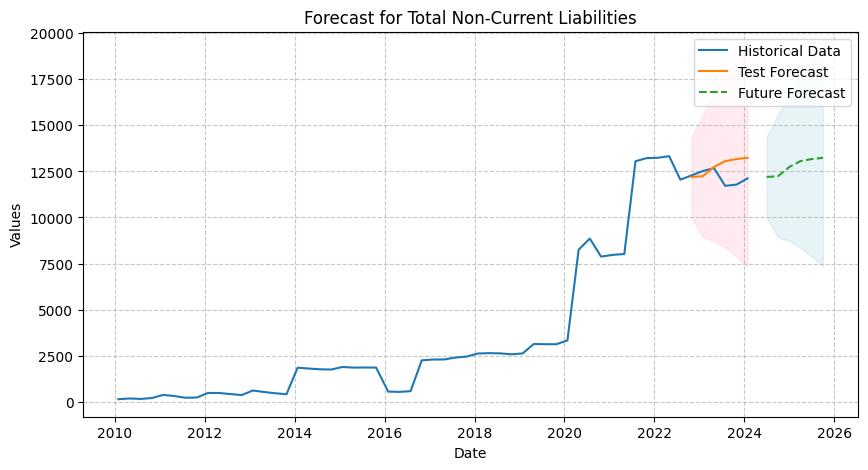

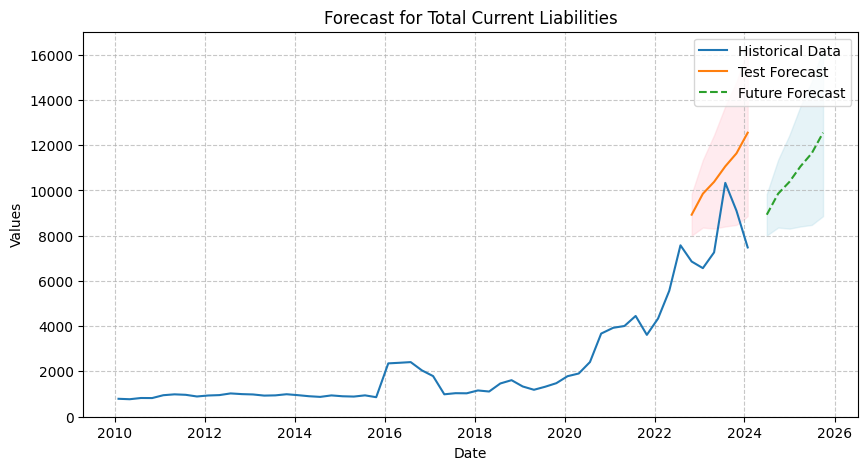

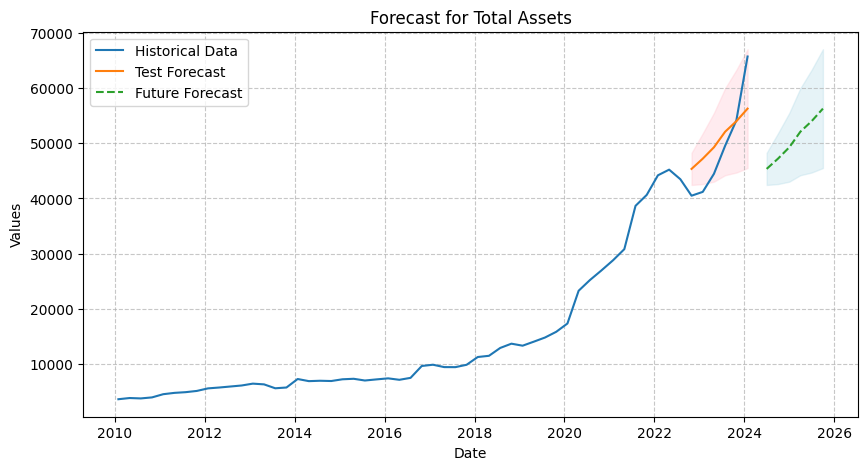

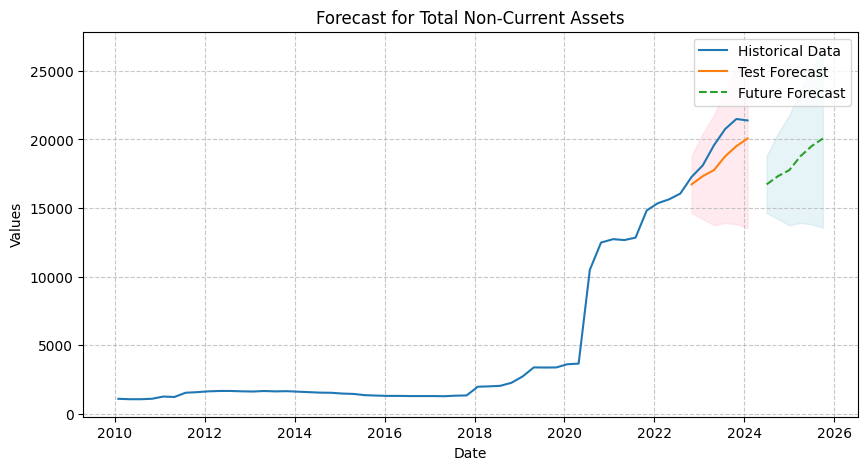

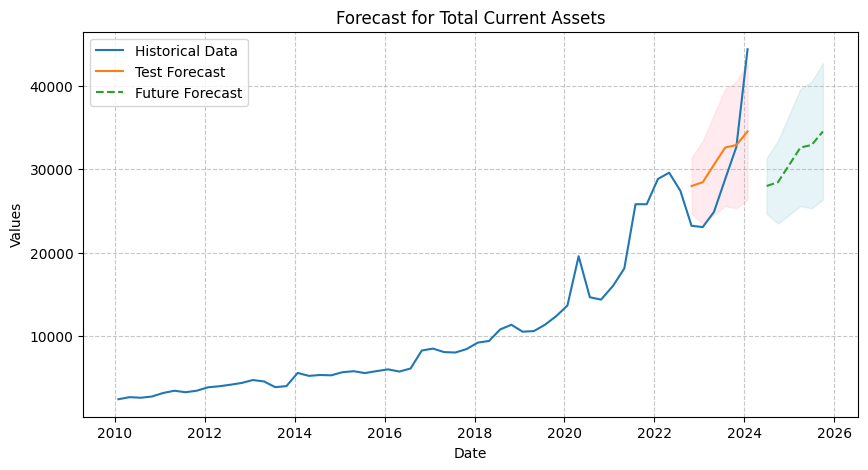

Future predictions for Total Liabilities & Equity:
         date      forecast      lower_ci      upper_ci
51 2024-06-30  45347.886672  42436.420333  48259.353011
52 2024-09-30  47200.993220  42599.760068  51802.226372
53 2024-12-31  49269.440844  43036.050806  55502.830883
54 2025-03-31  52094.714181  44205.859891  59983.568472
55 2025-06-30  53994.058616  44687.771299  63300.345933
56 2025-09-30  56276.484838  45504.966285  67048.003390
Future predictions for Shareholders Equity - Attributable to Parent Shareholders - Total:
         date      forecast      lower_ci      upper_ci
51 2024-06-30  21898.555141  20830.290557  22966.819725
52 2024-09-30  20440.333102  18002.662993  22878.003211
53 2024-12-31  20515.063948  16710.275788  24319.852108
54 2025-03-31  21895.209762  16794.890166  26995.529359
55 2025-06-30  23650.453048  17594.022863  29706.883233
56 2025-09-30  25314.594624  18554.419977  32074.769271
Future predictions for Total Liabilities:
         date      forecast      

In [ ]:
balance_df.reset_index(inplace=True)
balance_df['date'] = pd.to_datetime(balance_df['date'])
balance_df.set_index('date', inplace=True)

# Dividir los datos en entrenamiento y prueba (últimos 6 trimestres para prueba)
train = balance_df.iloc[:-6]
test = balance_df.iloc[-6:]

# Función para entrenar SARIMA y predecir con intervalos de confianza
def sarima_forecast(train, test, order, seasonal_order):
    model = sm.tsa.SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    forecast = model_fit.get_forecast(steps=len(test))
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    return forecast_mean, forecast_conf_int, model_fit

# Parámetros del modelo SARIMA
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)  # Trimestral

# Resultados
results = {}
for column in train.columns:
    forecast_mean, forecast_conf_int, model_fit = sarima_forecast(train[column], test[column], order, seasonal_order)
    rmse = np.sqrt(mean_squared_error(test[column], forecast_mean))
    results[column] = {
        'forecast_mean': forecast_mean,
        'forecast_conf_int': forecast_conf_int,
        'rmse': rmse,
        'model_fit': model_fit
    }

# Mostrar RMSE de cada variable
for column, result in results.items():
    print(f'{column} - RMSE: {result["rmse"]}')

# Predecir los próximos 6 trimestres usando el mejor modelo para cada variable
future_forecasts = {}
for column, result in results.items():
    best_model_fit = result['model_fit']
    future_forecast = best_model_fit.get_forecast(steps=6)
    future_forecast_mean = future_forecast.predicted_mean
    future_forecast_conf_int = future_forecast.conf_int()
    last_date = balance_df.index[-1]
    future_dates = pd.date_range(last_date, periods=7, freq='Q')[1:]  # Excluye la última fecha ya incluida
    future_forecasts[column] = {
        'mean': future_forecast_mean,
        'conf_int': future_forecast_conf_int,
        'dates': future_dates
    }

# Graficar resultados incluyendo predicciones futuras
for column, result in results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(balance_df.index, balance_df[column], label='Historical Data')
    plt.plot(test.index, result['forecast_mean'], label='Test Forecast')
    plt.fill_between(test.index,
                     result['forecast_conf_int'].iloc[:, 0],
                     result['forecast_conf_int'].iloc[:, 1], color='pink', alpha=0.3)
    future_forecast = future_forecasts[column]
    plt.plot(future_forecast['dates'], future_forecast['mean'], label='Future Forecast', linestyle='--')
    plt.fill_between(future_forecast['dates'],
                     future_forecast['conf_int'].iloc[:, 0],
                     future_forecast['conf_int'].iloc[:, 1], color='lightblue', alpha=0.3)
    plt.title(f'Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Mostrar predicciones futuras
for column, future in future_forecasts.items():
    future_df = pd.DataFrame({'date': future['dates'], 'forecast': future['mean'], 'lower_ci': future['conf_int'].iloc[:, 0], 'upper_ci': future['conf_int'].iloc[:, 1]})
    print(f"Future predictions for {column}:")
    print(future_df)

,date,forecast
0,2024-06-30,2241.467529
1,2024-09-30,1415.138672
2,2024-12-31,1108.087036
3,2025-03-31,1013.651367
4,2025-06-30,1443.790039


In [ ]:
#pip install xgboost
#!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import optuna

# Asegurarse de que 'date' esté como índice
cashflow_df.reset_index(inplace=True)
cashflow_df['date'] = pd.to_datetime(cashflow_df['date'])
cashflow_df.set_index('date', inplace=True)

# Dividir los datos en entrenamiento y prueba (últimos 5 trimestres para prueba)
train = cashflow_df.iloc[:-5]
test = cashflow_df.iloc[-5:]

# Función para crear características de retraso
def create_lag_features(df, lags):
    for lag in lags:
        df[f'lag_{lag}'] = df['value'].shift(lag)
    df.dropna(inplace=True)
    return df

# Preparar los datos para XGBoost
def prepare_data(df, lags):
    df_lagged = pd.DataFrame()
    for column in df.columns:
        temp_df = df[[column]].copy()
        temp_df.columns = ['value']
        temp_df = create_lag_features(temp_df, lags)
        temp_df['column'] = column
        df_lagged = pd.concat([df_lagged, temp_df], axis=0)
    return df_lagged

# Crear características de retraso
lags = [1, 2, 3, 4]  # Puedes ajustar estos valores
train_lagged = prepare_data(train, lags)
test_lagged = prepare_data(test, lags)


In [ ]:
# Función de objetivo para Optuna
def objective(trial):
    models = {}
    predictions = {}
    rmse_scores = []

    for column in train_lagged['column'].unique():
        train_subset = train_lagged[train_lagged['column'] == column]
        test_subset = test_lagged[test_lagged['column'] == column]

        X_train = train_subset.drop(['value', 'column'], axis=1)
        y_train = train_subset['value']
        X_test = test_subset.drop(['value', 'column'], axis=1)
        y_test = test_subset['value']

        param = {
            'objective': 'reg:squarederror',
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
        }

        model = xgb.XGBRegressor(**param)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

        models[column] = model
        predictions[column] = {
            'y_test': y_test,
            'y_pred': y_pred,
            'rmse': rmse
        }

    return np.mean(rmse_scores)

# Optimización bayesiana con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Best parameters:", best_params)


[I 2024-05-27 20:15:09,761] A new study created in memory with name: no-name-f2ffd4fe-a31c-42f8-98f8-be79ed71d9e0
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit`

Best parameters: {'n_estimators': 273, 'learning_rate': 0.08777159724320553, 'max_depth': 8, 'subsample': 0.5310014813633501, 'colsample_bytree': 0.6603611128161835}


In [ ]:
# Entrenar y predecir usando los mejores hiperparámetros
def xgboost_forecast_with_best_params(train, test, best_params):
    models = {}
    predictions = {}
    for column in train['column'].unique():
        train_subset = train[train['column'] == column]
        test_subset = test[test['column'] == column]

        X_train = train_subset.drop(['value', 'column'], axis=1)
        y_train = train_subset['value']
        X_test = test_subset.drop(['value', 'column'], axis=1)
        y_test = test_subset['value']

        model = xgb.XGBRegressor(**best_params)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        models[column] = model
        predictions[column] = {
            'y_test': y_test,
            'y_pred': y_pred,
            'rmse': rmse
        }

    return models, predictions

models, predictions = xgboost_forecast_with_best_params(train_lagged, test_lagged, best_params)

# Mostrar RMSE de cada variable
for column, result in predictions.items():
    print(f'{column} - RMSE: {result["rmse"]}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`se

Net Cash Flow from Operating Activities - RMSE: 9643.430053710938
Net Cash Flow from Investing Activities - RMSE: 4511.6390380859375
Net Cash Flow from Financing Activities - RMSE: 106.24755859375
Net Change in Cash - Total - RMSE: 1730.9466400146484
Net Cash - Beginning Balance - RMSE: 345.32568359375
Net Cash - Ending Balance - RMSE: 2830.17138671875
FCN Ok - RMSE: 1730.9462432861328


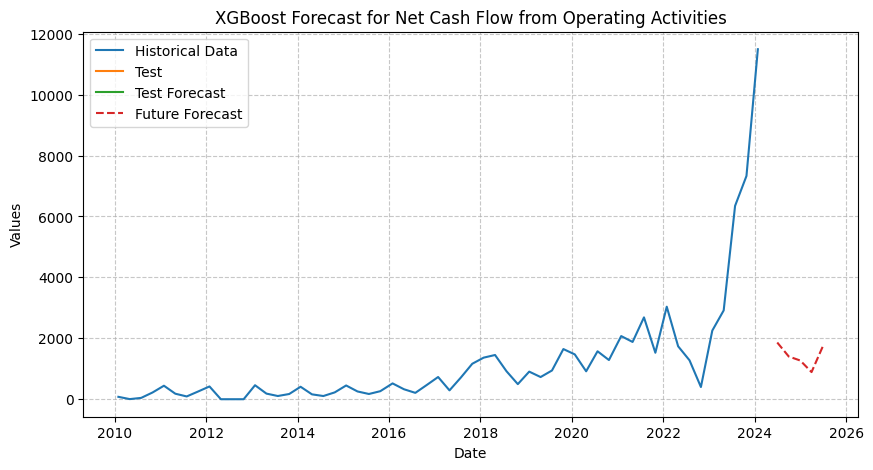

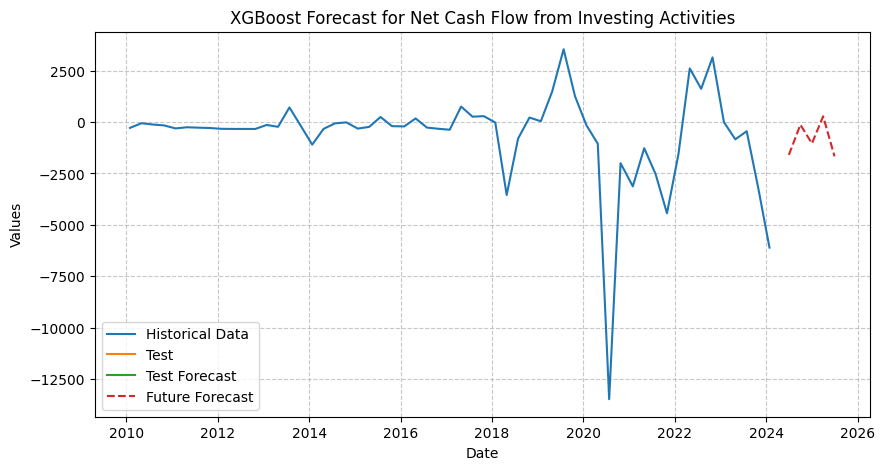

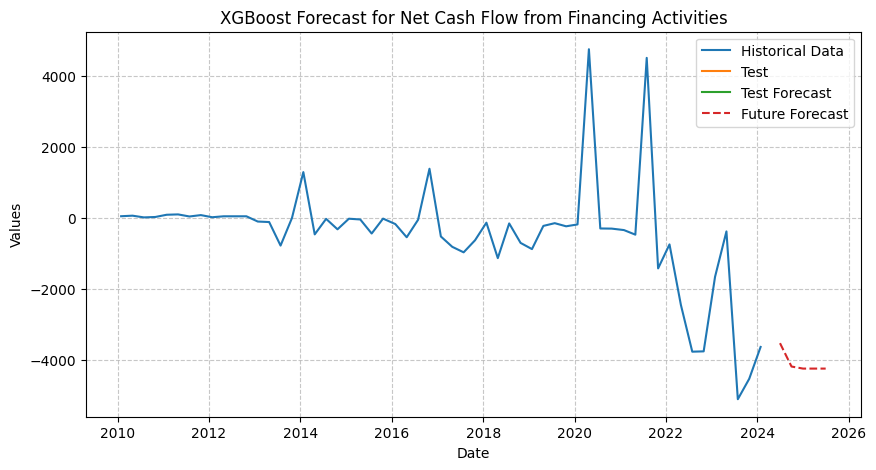

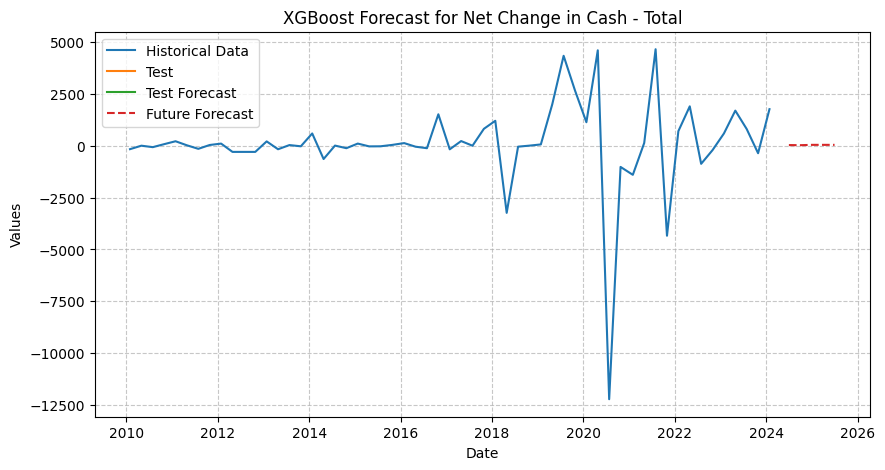

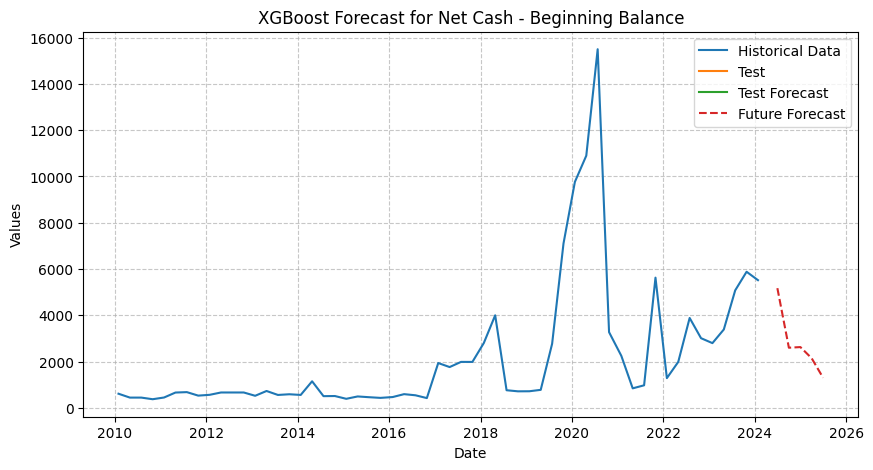

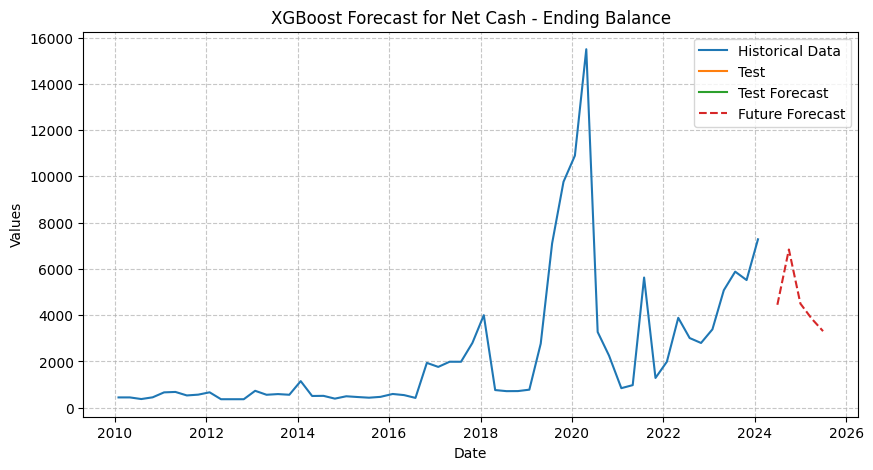

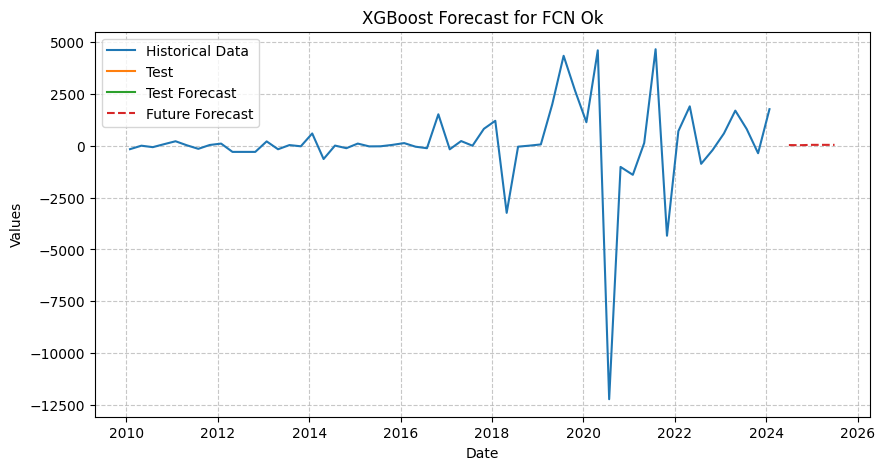

Future predictions for Net Cash Flow from Operating Activities:
        date     forecast
0 2024-06-30  1855.569946
1 2024-09-30  1395.673706
2 2024-12-31  1262.788696
3 2025-03-31   883.335449
4 2025-06-30  1736.726440
Future predictions for Net Cash Flow from Investing Activities:
        date     forecast
0 2024-06-30 -1597.360962
1 2024-09-30  -127.886002
2 2024-12-31 -1041.590088
3 2025-03-31   279.257507
4 2025-06-30 -1670.249634
Future predictions for Net Cash Flow from Financing Activities:
        date     forecast
0 2024-06-30 -3522.752441
1 2024-09-30 -4179.582520
2 2024-12-31 -4237.421875
3 2025-03-31 -4237.421875
4 2025-06-30 -4237.421875
Future predictions for Net Change in Cash - Total:
        date   forecast
0 2024-06-30  30.053360
1 2024-09-30  24.119610
2 2024-12-31  40.687302
3 2025-03-31  40.687302
4 2025-06-30  40.687302
Future predictions for Net Cash - Beginning Balance:
        date     forecast
0 2024-06-30  5173.674316
1 2024-09-30  2601.560059
2 2024-12-31  

In [ ]:
# Función para predecir futuros valores
def xgboost_future_forecast(models, df, lags, periods):
    future_forecasts = {}
    for column, model in models.items():
        history = df[column].copy()
        future = []
        for _ in range(periods):
            lag_features = [history.shift(lag).iloc[-1] for lag in lags]
            X = np.array(lag_features).reshape(1, -1)
            y_pred = model.predict(X)[0]
            future.append(y_pred)
            history = pd.concat([history, pd.Series([y_pred], index=[history.index[-1] + pd.DateOffset(months=3)])])
        future_forecasts[column] = future
    return future_forecasts

# Predecir los próximos 5 trimestres usando XGBoost
future_forecasts = xgboost_future_forecast(models, cashflow_df, lags, 5)

# Crear rango de fechas para las predicciones futuras
last_date = cashflow_df.index[-1]
future_dates = pd.date_range(last_date, periods=6, freq='Q')[1:]  # Excluye la última fecha ya incluida

# Graficar resultados incluyendo predicciones futuras
for column, result in predictions.items():
    plt.figure(figsize=(10, 5))
    plt.plot(cashflow_df.index, cashflow_df[column], label='Historical Data')
    plt.plot(result['y_test'].index, result['y_test'], label='Test')
    plt.plot(result['y_test'].index, result['y_pred'], label='Test Forecast')
    plt.plot(future_dates, future_forecasts[column], label='Future Forecast', linestyle='--')
    plt.title(f'XGBoost Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Mostrar predicciones futuras
for column, future in future_forecasts.items():
    future_df = pd.DataFrame({'date': future_dates, 'forecast': future})
    print(f"Future predictions for {column}:")
    print(future_df)


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import optuna

# Asegurarse de que 'date' esté como índice
inStatement_df.reset_index(inplace=True)
inStatement_df['date'] = pd.to_datetime(inStatement_df['date'])
inStatement_df.set_index('date', inplace=True)

# Dividir los datos en entrenamiento y prueba (últimos 5 trimestres para prueba)
train = inStatement_df.iloc[:-5]
test = inStatement_df.iloc[-5:]

# Función para crear características de retraso
def create_lag_features(df, lags):
    for lag in lags:
        df[f'lag_{lag}'] = df['value'].shift(lag)
    df.dropna(inplace=True)
    return df

# Preparar los datos para XGBoost
def prepare_data(df, lags):
    df_lagged = pd.DataFrame()
    for column in df.columns:
        temp_df = df[[column]].copy()
        temp_df.columns = ['value']
        temp_df = create_lag_features(temp_df, lags)
        temp_df['column'] = column
        df_lagged = pd.concat([df_lagged, temp_df], axis=0)
    return df_lagged

# Crear características de retraso
lags = [1, 2, 3, 4]  # Puedes ajustar estos valores
train_lagged = prepare_data(train, lags)
test_lagged = prepare_data(test, lags)


In [ ]:
# Función de objetivo para Optuna
def objective(trial):
    models = {}
    predictions = {}
    rmse_scores = []

    for column in train_lagged['column'].unique():
        train_subset = train_lagged[train_lagged['column'] == column]
        test_subset = test_lagged[test_lagged['column'] == column]

        X_train = train_subset.drop(['value', 'column'], axis=1)
        y_train = train_subset['value']
        X_test = test_subset.drop(['value', 'column'], axis=1)
        y_test = test_subset['value']

        param = {
            'objective': 'reg:squarederror',
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
        }

        model = xgb.XGBRegressor(**param)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

        models[column] = model
        predictions[column] = {
            'y_test': y_test,
            'y_pred': y_pred,
            'rmse': rmse
        }

    return np.mean(rmse_scores)

# Optimización bayesiana con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Best parameters:", best_params)


[I 2024-05-27 20:18:34,984] A new study created in memory with name: no-name-6795db0f-f427-4ba8-bc96-2d16c824dc73
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit`

Best parameters: {'n_estimators': 850, 'learning_rate': 0.09459763468881231, 'max_depth': 6, 'subsample': 0.5514523544762446, 'colsample_bytree': 0.658227654048807}


In [ ]:
# Entrenar y predecir usando los mejores hiperparámetros
def xgboost_forecast_with_best_params(train, test, best_params):
    models = {}
    predictions = {}
    for column in train['column'].unique():
        train_subset = train[train['column'] == column]
        test_subset = test[test['column'] == column]

        X_train = train_subset.drop(['value', 'column'], axis=1)
        y_train = train_subset['value']
        X_test = test_subset.drop(['value', 'column'], axis=1)
        y_test = test_subset['value']

        model = xgb.XGBRegressor(**best_params)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        models[column] = model
        predictions[column] = {
            'y_test': y_test,
            'y_pred': y_pred,
            'rmse': rmse
        }

    return models, predictions

models, predictions = xgboost_forecast_with_best_params(train_lagged, test_lagged, best_params)

# Mostrar RMSE de cada variable
for column, result in predictions.items():
    print(f'{column} - RMSE: {result["rmse"]}')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`se

Revenue from Business Activities - Total_1 - RMSE: 15373.79296875
Gross Profit - Industrials/Property - Total_1 - RMSE: 13524.9453125
Operating Profit before Non-Recurring Income/Expense - RMSE: 12009.2861328125
Net Income after Tax - RMSE: 10043.532470703125


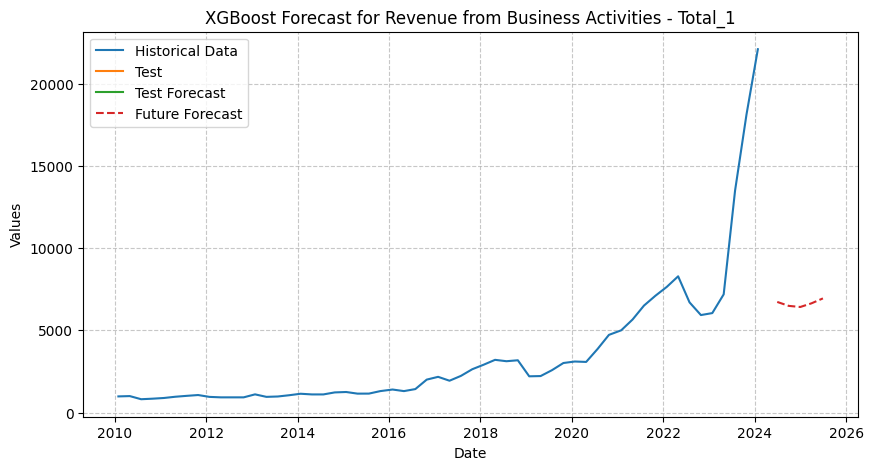

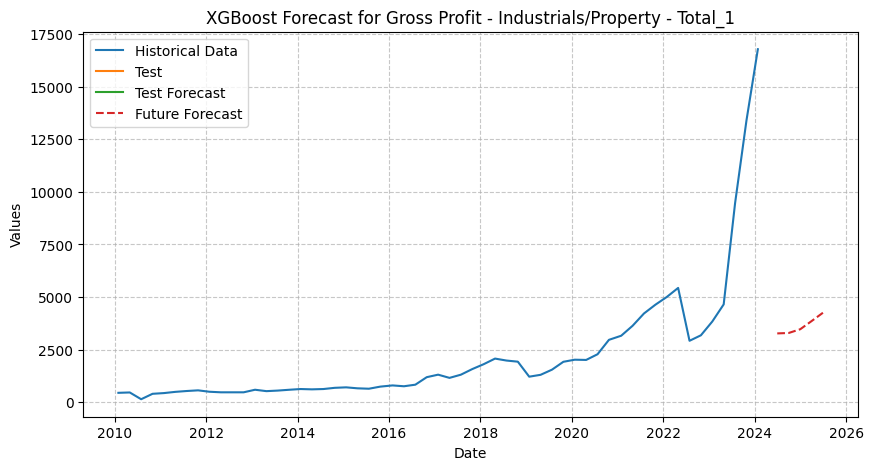

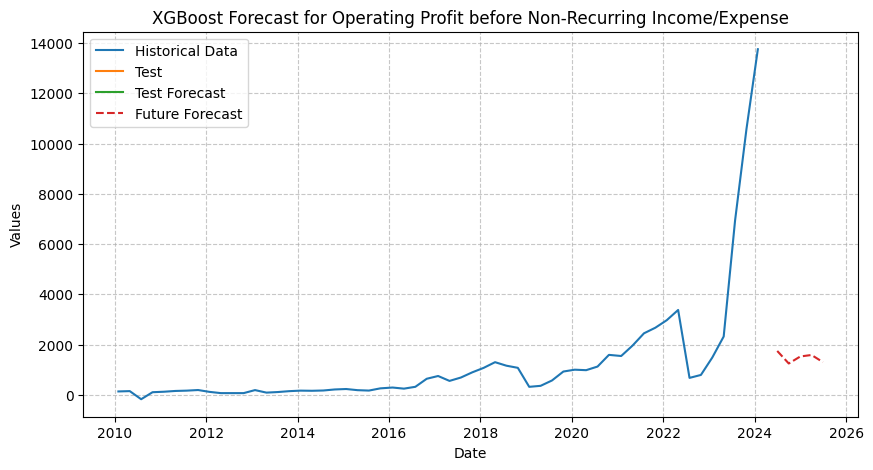

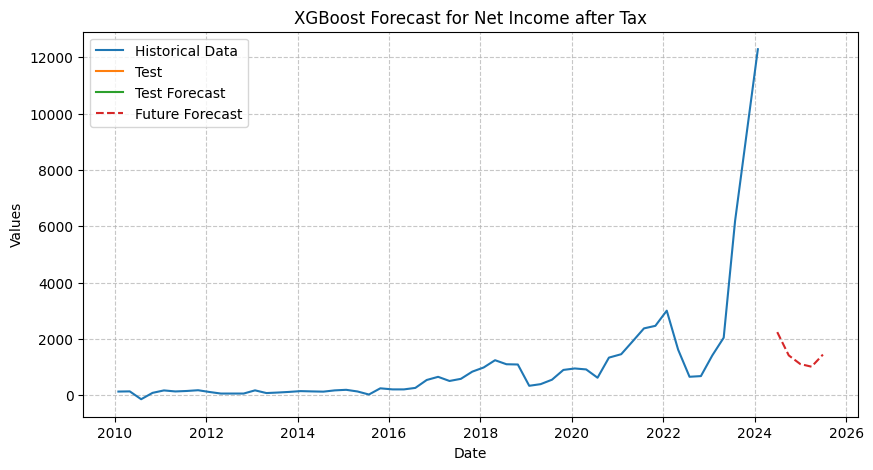

Future predictions for Revenue from Business Activities - Total_1:
        date     forecast
0 2024-06-30  6729.207031
1 2024-09-30  6489.650391
2 2024-12-31  6422.087891
3 2025-03-31  6646.412109
4 2025-06-30  6944.947754
Future predictions for Gross Profit - Industrials/Property - Total_1:
        date     forecast
0 2024-06-30  3266.054688
1 2024-09-30  3287.591309
2 2024-12-31  3465.757080
3 2025-03-31  3851.240723
4 2025-06-30  4249.102051
Future predictions for Operating Profit before Non-Recurring Income/Expense:
        date     forecast
0 2024-06-30  1745.713867
1 2024-09-30  1246.659668
2 2024-12-31  1525.835083
3 2025-03-31  1585.449951
4 2025-06-30  1300.929565
Future predictions for Net Income after Tax:
        date     forecast
0 2024-06-30  2241.467529
1 2024-09-30  1415.138672
2 2024-12-31  1108.087036
3 2025-03-31  1013.651367
4 2025-06-30  1443.790039


In [ ]:
# Función para predecir futuros valores
def xgboost_future_forecast(models, df, lags, periods):
    future_forecasts = {}
    for column, model in models.items():
        history = df[column].copy()
        future = []
        for _ in range(periods):
            lag_features = [history.shift(lag).iloc[-1] for lag in lags]
            X = np.array(lag_features).reshape(1, -1)
            y_pred = model.predict(X)[0]
            future.append(y_pred)
            history = pd.concat([history, pd.Series([y_pred], index=[history.index[-1] + pd.DateOffset(months=3)])])
        future_forecasts[column] = future
    return future_forecasts

# Predecir los próximos 5 trimestres usando XGBoost
future_forecasts = xgboost_future_forecast(models, inStatement_df, lags, 5)

# Crear rango de fechas para las predicciones futuras
last_date = inStatement_df.index[-1]
future_dates = pd.date_range(last_date, periods=6, freq='Q')[1:]  # Excluye la última fecha ya incluida

# Graficar resultados incluyendo predicciones futuras
for column, result in predictions.items():
    plt.figure(figsize=(10, 5))
    plt.plot(inStatement_df.index, inStatement_df[column], label='Historical Data')
    plt.plot(result['y_test'].index, result['y_test'], label='Test')
    plt.plot(result['y_test'].index, result['y_pred'], label='Test Forecast')
    plt.plot(future_dates, future_forecasts[column], label='Future Forecast', linestyle='--')
    plt.title(f'XGBoost Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Mostrar predicciones futuras
for column, future in future_forecasts.items():
    future_df = pd.DataFrame({'date': future_dates, 'forecast': future})
    print(f"Future predictions for {column}:")
    print(future_df)
